# 광고 종류에 따른 구매 전환율 분석

- 실험 그룹 : 광고를 본 사용자들 / 대조 그룹 : 공익광고(PSA)만 본 사용자
- 구매 전환율에 미치는 영향을 분석해보기

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("/kaggle/input/marketing-ab-testing/marketing_AB.csv")

In [3]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


# <span style="background-color: pink">광고 종류를 기준으로 전환율 분석

In [5]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

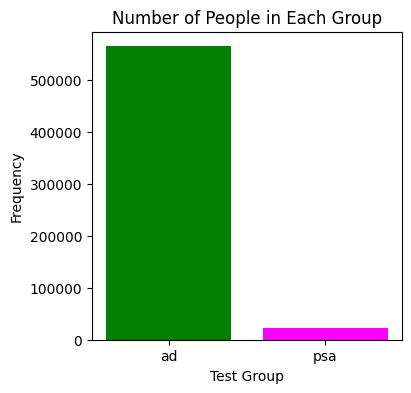

In [6]:
import matplotlib.pyplot as plt

# 'test group' 열을 그룹별로 카운트
group_counts = df['test group'].value_counts().reset_index()
group_counts.columns = ['test group', 'count']

# 색상 선택
colors = ['green', 'fuchsia']  # plotly의 Set3 팔레트에서 선택

# 막대 그래프 생성
plt.figure(figsize=(4, 4))
plt.bar(group_counts['test group'], group_counts['count'], color=colors)

# 그래프 제목과 레이블 설정
plt.title('Number of People in Each Group')
plt.xlabel('Test Group')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

### 두 그룹 간의 전환율에 차이가 있는지를 통계적으로 검정
- 광고 캠페인의 효과를 평가하기 위해서
- 귀무가설 (H0): 두 그룹 간의 평균 전환율에 차이가 없다.
- 대립가설 (H1): 두 그룹 간의 평균 전환율에 차이가 있다.

In [7]:
ad_group = df[df['test group'] == 'ad']['converted']
psa_group = df[df['test group'] == 'psa']['converted']

## count 확인

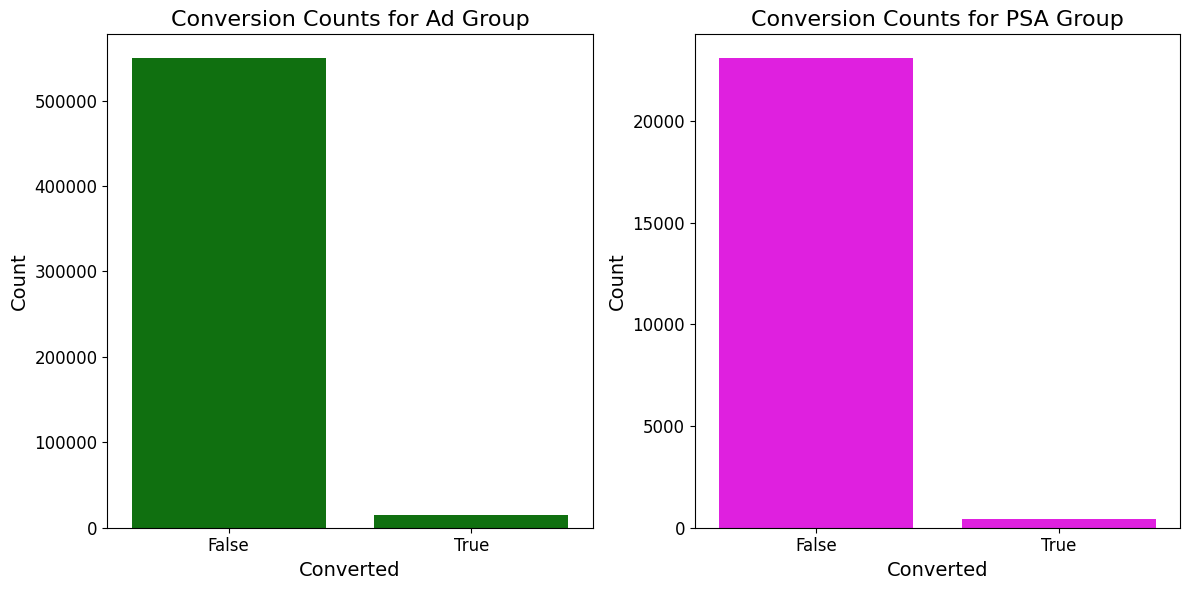

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# True, False 값의 수 계산
ad_converted_counts = df[df['test group'] == 'ad']['converted'].value_counts()
psa_converted_counts = df[df['test group'] == 'psa']['converted'].value_counts()

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 'ad' 그룹의 converted 컬럼 시각화
sns.barplot(x=ad_converted_counts.index, 
            y=ad_converted_counts.values, ax=axes[0],
            color='green')  # 색상 직접 지정
axes[0].set_title('Conversion Counts for Ad Group', fontsize=16)
axes[0].set_xlabel('Converted', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# 'psa' 그룹의 converted 컬럼 시각화
sns.barplot(x=psa_converted_counts.index, 
            y=psa_converted_counts.values, ax=axes[1],
            color='fuchsia')  # 색상 직접 지정
axes[1].set_title('Conversion Counts for PSA Group', fontsize=16)
axes[1].set_xlabel('Converted', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

In [9]:
# 광고 그룹의 전환율 계산
ad_conversion_rate = df[df['test group'] == 'ad']['converted'].mean()*100

# 공익광고 그룹의 전환율 계산
psa_conversion_rate = df[df['test group'] == 'psa']['converted'].mean()* 100

print(f"Ad Group Conversion Rate: {ad_conversion_rate:.4f}%")
print(f"PSA Group Conversion Rate: {psa_conversion_rate:.4f}%")
print("이 전환율의 차이가 통계적으로 유의미한지 확인해봐야 함")

Ad Group Conversion Rate: 2.5547%
PSA Group Conversion Rate: 1.7854%
이 전환율의 차이가 통계적으로 유의미한지 확인해봐야 함


## 정규성 검정

In [10]:
from scipy.stats import shapiro

# Shapiro-Wilk test for 'ad' group
stat_ad, p_ad = shapiro(ad_group)
print(f"Shapiro-Wilk Test for 'ad' group - Statistic: {stat_ad:.4f}, P-value: {p_ad:.4f}")

# Shapiro-Wilk test for 'psa' group
stat_psa, p_psa = shapiro(psa_group)
print(f"Shapiro-Wilk Test for 'psa' group - Statistic: {stat_psa:.4f}, P-value: {p_psa:.4f}")

Shapiro-Wilk Test for 'ad' group - Statistic: 0.1423, P-value: 0.0000
Shapiro-Wilk Test for 'psa' group - Statistic: 0.1102, P-value: 0.0000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 등분산성 검정

In [11]:
from scipy.stats import levene

# Levene's test로 등분산성 검정
levene_stat, levene_p = levene(ad_group, psa_group)
print(f"Levene’s Test - Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")

Levene’s Test - Statistic: 54.3229, P-value: 0.0000


In [12]:
from scipy.stats import mannwhitneyu

# 'ad' 그룹과 'psa' 그룹의 converted 카운트
ad_group = df[df['test group'] == 'ad']['converted']
psa_group = df[df['test group'] == 'psa']['converted']

# Mann-Whitney U test 수행
u_stat, p_value = mannwhitneyu(ad_group, psa_group)

print(f"Mann-Whitney U test - Statistic: {u_stat:.4f}, P-value: {p_value:.4f}")

Mann-Whitney U test - Statistic: 6691636830.0000, P-value: 0.0000


- 결과 정리 
- 두 그룹 간의 차이는 우연에 의해 발생했다고 보기 어렵고, 실제로 차이가 있다
- ad 그룹과 psa 그룹 간에 통계적으로 유의미한 차이가 있다

## 시각화로 광고 종류에 따른 전환율 확인

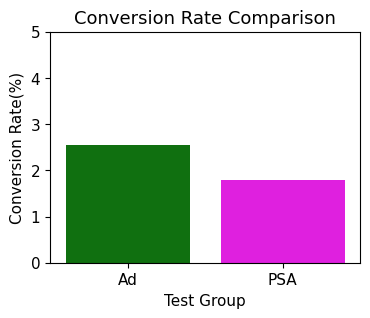

In [13]:
# 전환율 데이터 준비
conversion_rates = {
    'Group': ['Ad', 'PSA'],
    'Conversion Rate': [ad_conversion_rate, psa_conversion_rate]
}

# 데이터프레임 생성
conversion_rates_df = pd.DataFrame(conversion_rates)

# 시각화
plt.figure(figsize=(4, 3))

# 색상 매핑
palette = {'Ad': 'green', 'PSA': 'fuchsia'}

sns.barplot(x='Group', y='Conversion Rate', data=conversion_rates_df, palette=palette)

# 제목 및 레이블 설정
plt.title('Conversion Rate Comparison', fontsize=13)
plt.xlabel('Test Group', fontsize=11)
plt.ylabel('Conversion Rate(%)', fontsize=11)
plt.ylim(0, 5)  # 전환율 범위를 0에서 1로 설정
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 그래프 출력
plt.show()

# <span style="background-color: pink">시청한 광고 수를 기준으로 전환율 분석

### 각 total ads 그룹 간의 전환율에 차이가 있는지를 통계적으로 검정
- 귀무가설 (H₀): total ads의 구간에 따라 전환율이 차이가 없다. 즉, 구간에 관계없이 전환율은 동일하다.
- 대립가설 (H₁): total ads의 구간에 따라 전환율이 차이가 있다. 즉, 구간에 따라 전환율이 다르다.

In [14]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

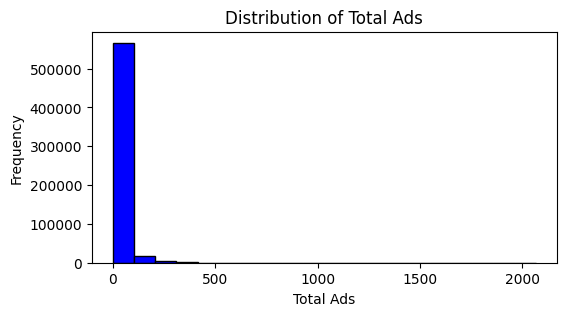

In [15]:
import matplotlib.pyplot as plt

# 서브플롯 생성
plt.figure(figsize=(6, 3))

# 'total ads' 컬럼의 히스토그램 시각화
plt.hist(df['total ads'], bins=20, color='blue', edgecolor='black')

plt.title('Distribution of Total Ads', fontsize=12)
plt.xlabel('Total Ads', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

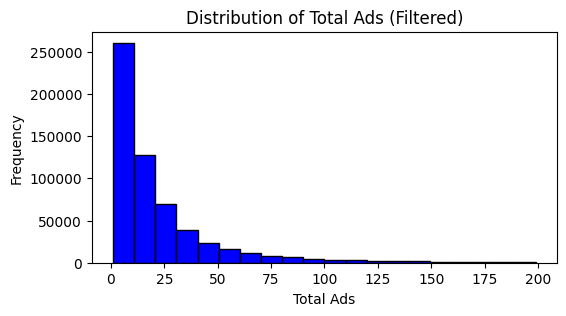

In [16]:
# 'total ads'가 200 미만인 데이터만 필터링
filtered_df = df[df['total ads'] < 200]

# 서브플롯 생성
plt.figure(figsize=(6, 3))  # 사이즈 조정

# 필터링된 데이터의 'total ads' 컬럼의 히스토그램 시각화
plt.hist(filtered_df['total ads'], bins=20, color='blue', edgecolor='black')

# 제목 및 레이블 설정
plt.title('Distribution of Total Ads (Filtered)', fontsize=12)
plt.xlabel('Total Ads', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [17]:
# total ads의 구간 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", 
          "51-60", "61-70", "71-80", "81-90", "91-100", 
          "101-150", "151-200"]

# total ads를 구간으로 나누기
df['total_ads_group'] = pd.cut(df['total ads'], 
                               bins=bins, labels=labels, right=True)

# 구간별로 converted의 True와 False 값 집계
grouped = df.groupby('total_ads_group')['converted'].value_counts().unstack().fillna(0).reset_index()

# 컬럼명 수정
grouped.columns = ['total_ads_group', 'converted_false', 'converted_true']

# DataFrame 확인
print(grouped)

   total_ads_group  converted_false  converted_true
0             0-10           259917             858
1            11-20           126414            1070
2            21-30            67899            1223
3            31-40            37251            1262
4            41-50            21852            1289
5            51-60            14409            1272
6            61-70             9924            1231
7            71-80             7182            1050
8            81-90             5297             906
9           91-100             3948             783
10         101-150            10207            2180
11         151-200             3933             792


- 데이터가 범주형 구간으로 나뉜 경우에는 비모수 검정이 적합하다

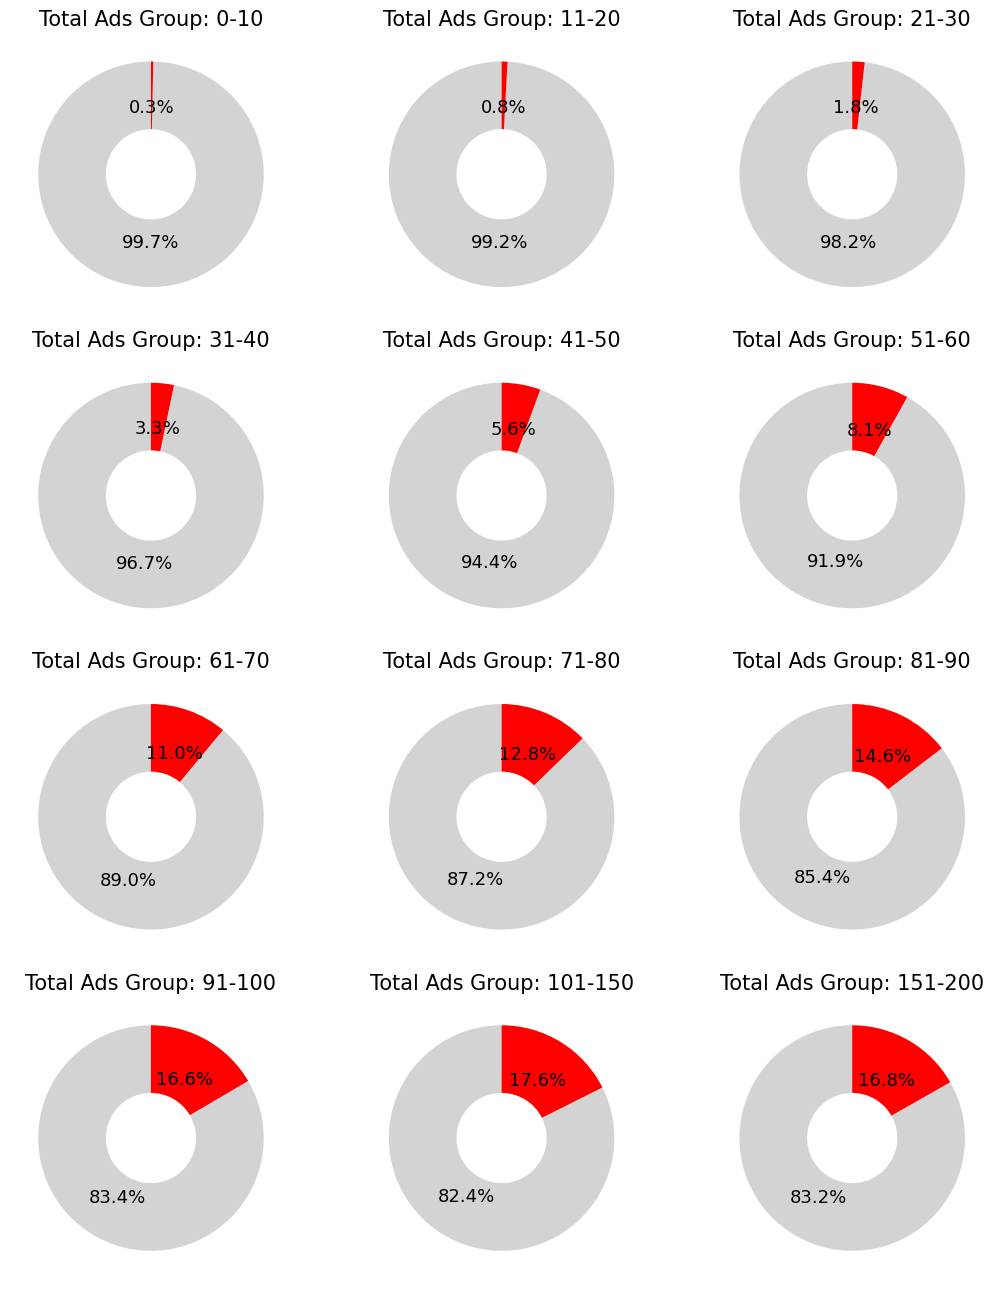

In [18]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11, 13))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# 색상 지정
colors = ['lightgray', 'red']

# 각 구간에 대해 도넛 차트를 생성
for i, (index, row) in enumerate(grouped.iterrows()):
    sizes = [row['converted_false'], row['converted_true']]
    labels = ['', '']
    
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,  # 색상 지정
        wedgeprops=dict(width=0.6)  # 도넛 차트의 너비를 설정하여 구멍 크기 조정
    )
    
    # 제목의 글씨 크기 조정
    axes[i].set_title(f'Total Ads Group: {row["total_ads_group"]}', 
                      fontsize=15)

    # 퍼센트 및 수치 데이터의 글씨 크기 조정
    for autotext in autotexts:
        autotext.set_fontsize(13)  # 퍼센트 글씨 크기 조정
    
    for text in texts:
        text.set_fontsize(13)  # 레이블 글씨 크기 조정

plt.tight_layout()
plt.show()

- 특히나 광고 시청이 많아질수록 구매 전환율이 높아지는 것을 알 수 있음

In [19]:
# 구간별 전환율 계산
conversion_rates_by_group = df.groupby(['total_ads_group', 'test group'])['converted'].mean() * 100
conversion_rates_by_group

total_ads_group  test group
0-10             ad             0.325853
                 psa            0.399078
11-20            ad             0.839995
                 psa            0.819277
21-30            ad             1.779289
                 psa            1.547779
31-40            ad             3.290607
                 psa            2.904866
41-50            ad             5.666142
                 psa            3.160271
51-60            ad             8.243252
                 psa            4.817276
61-70            ad            11.278266
                 psa            5.298013
71-80            ad            12.988331
                 psa            7.471264
81-90            ad            15.020161
                 psa            4.780876
91-100           ad            16.924095
                 psa            8.040201
101-150          ad            17.909566
                 psa           10.694184
151-200          ad            17.066134
                 psa         

In [20]:
# 'total_ads_group'과 'test group'을 기준으로 전환된 사용자 수를 계산하는 교차표 생성
contingency_table_sum = pd.crosstab(df['total_ads_group'], 
                                    df['test group'], 
                                    values=df['converted'], 
                                    aggfunc='sum').fillna(0)

contingency_table_sum

test group,ad,psa
total_ads_group,,
0-10,813,45
11-20,1036,34
21-30,1177,46
31-40,1222,40
41-50,1261,28
51-60,1243,29
61-70,1207,24
71-80,1024,26
81-90,894,12


In [21]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_sum)

print("\nChi-square Statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square Statistic: 40.93447527885754
P-value: 2.4734198404739907e-05


- total_ads_group(광고 수 구간)에 따라 test group(ad 또는 psa)에서의 전환율에 유의미한 차이가 있음!!

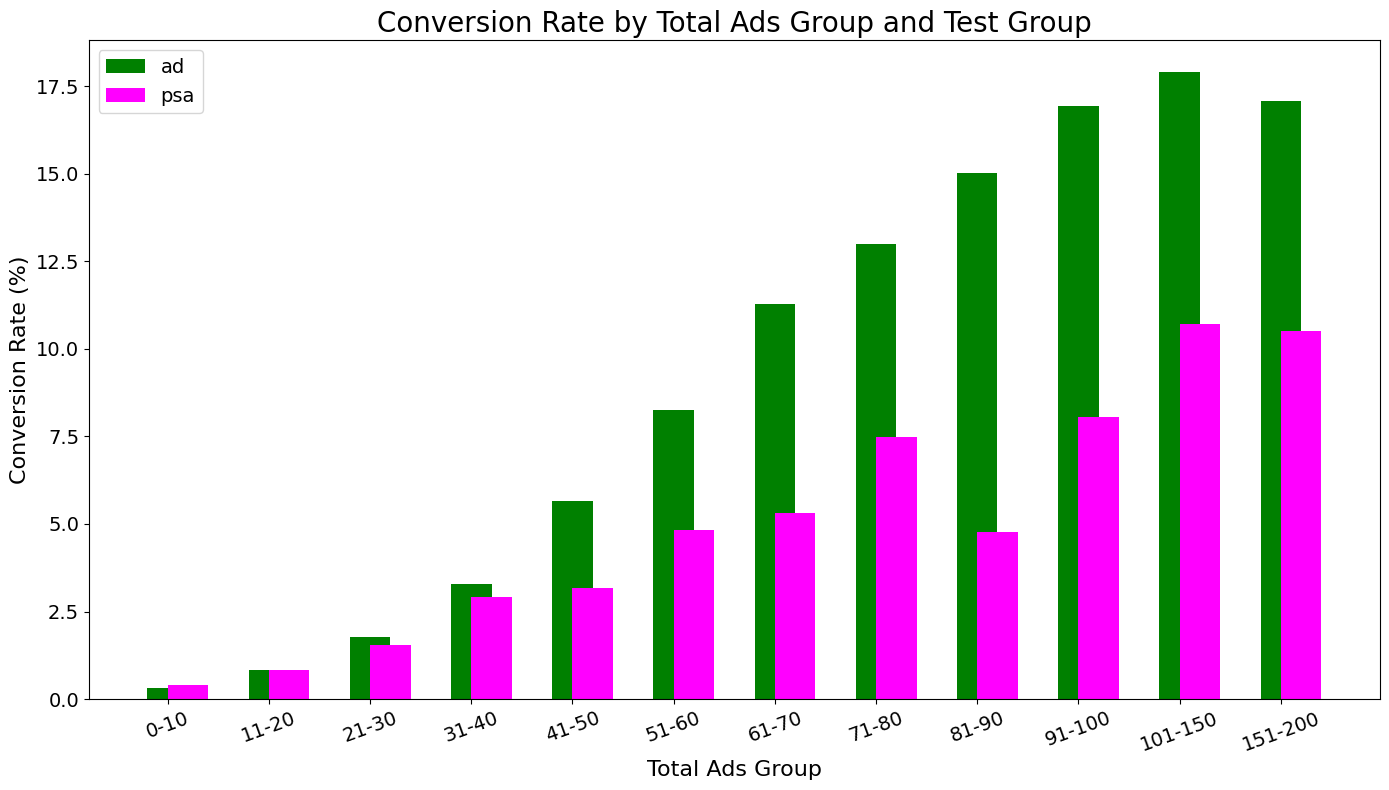

In [22]:
# 각 구간별 전환율 계산
conversion_rates_ad = contingency_table_sum['ad'] / df[df['test group'] == 'ad'].groupby('total_ads_group').size() * 100
conversion_rates_psa = contingency_table_sum['psa'] / df[df['test group'] == 'psa'].groupby('total_ads_group').size() * 100

# 그래프 생성
plt.figure(figsize=(14, 8))

# 'ad'에 대한 막대 그래프
plt.bar(conversion_rates_ad.index, 
        conversion_rates_ad, 
        color='green', 
        label='ad', 
        width=0.4, 
        align='center')

# 'psa'에 대한 막대 그래프
plt.bar(conversion_rates_psa.index, 
        conversion_rates_psa, 
        color='fuchsia', 
        label='psa', 
        width=0.4, 
        align='edge')

# 그래프 레이블 및 타이틀 설정
plt.xlabel('Total Ads Group', fontsize=16)
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.title('Conversion Rate by Total Ads Group and Test Group', 
          fontsize=20)
plt.xticks(rotation = 20, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

전환율 분석
- 전환율이 광고 수와 함께 증가: ad 그룹에서는 광고를 많이 시청할수록 전환율이 꾸준히 증가하는 경향이 있습니다. 예를 들어, 0-10 구간의 전환율은 약 0.33%에 불과하지만, 91-100 구간에서는 약 16.92%로 급격히 증가합니다. psa 그룹에서도 유사한 패턴이 보이지만, 전환율의 증가폭은 ad 그룹에 비해 다소 낮습니다.
- 구간별 전환율 차이: 광고를 시청한 수가 많아질수록 ad 그룹이 psa 그룹에 비해 전환율이 상대적으로 더 높아지는 경향이 있습니다. 특히, 71-80 구간부터 151-200 구간에 이르기까지 ad 그룹의 전환율이 psa 그룹보다 더 높은 수치를 기록하고 있습니다.

시사점 및 회사에서의 적용 방안
- 광고의 효과성: ad 그룹에서 광고 시청 수가 증가함에 따라 전환율이 더 높은 것은 광고가 사용자들에게 긍정적인 영향을 미칠 가능성이 있음을 시사합니다. 광고를 많이 노출할수록 구매로 이어질 확률이 높아지는 것으로 볼 수 있습니다.
- 마케팅 전략 조정: 회사는 이 인사이트를 바탕으로 특정 광고를 더 많이 노출하는 전략을 취할 수 있습니다. 예를 들어, 특정 상품이나 서비스에 대해 광고를 강화하고, 특히 전환율이 낮은 psa 광고에 대해서는 효과적인 개선 방안을 찾거나 광고 예산을 ad 그룹에 집중할 수 있습니다.
- 광고와 PSA 비교: psa 그룹의 전환율이 전체적으로 낮다는 점에서, 광고가 없거나 공익성 광고를 노출하는 것보다는 실제 상품 광고를 통해 전환을 유도하는 것이 더 효과적일 수 있음을 알 수 있습니다.

# <span style="background-color: pink">요일 기준 전환율 분석

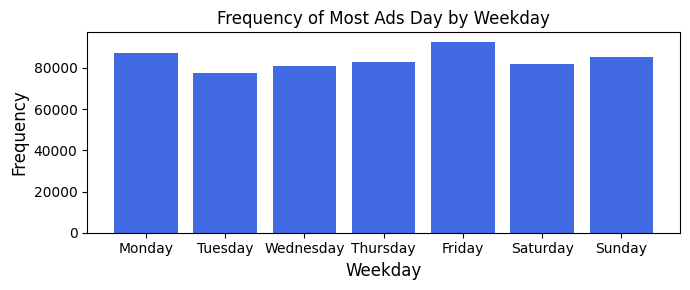

In [23]:
# 요일별 광고 노출 빈도 계산
weekday_counts = df['most ads day'].value_counts()

# 요일 순서 정의
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 빈도 데이터를 DataFrame으로 변환
weekday_counts_df = pd.DataFrame(weekday_counts).reset_index()
weekday_counts_df.columns = ['Weekday', 'Frequency']

# 요일 순서에 맞게 DataFrame 정렬
weekday_counts_df['Weekday'] = pd.Categorical(weekday_counts_df['Weekday'], categories=weekday_order, ordered=True)
weekday_counts_df = weekday_counts_df.sort_values('Weekday')

# 요일별 빈도 막대 그래프 생성
plt.figure(figsize=(7, 3))
plt.bar(weekday_counts_df['Weekday'], 
        weekday_counts_df['Frequency'], 
        color='royalblue')
plt.title('Frequency of Most Ads Day by Weekday', fontsize=12)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
day_grouped = df.groupby('most ads day')['converted'].value_counts().unstack().fillna(0).reset_index()

# 컬럼명 수정
day_grouped.columns = ['day_group', 'converted_false', 'converted_true']

# DataFrame 확인
print(day_grouped)

   day_group  converted_false  converted_true
0     Friday            90551            2057
1     Monday            84216            2857
2   Saturday            79941            1719
3     Sunday            83301            2090
4   Thursday            81192            1790
5    Tuesday            75167            2312
6  Wednesday            78890            2018


In [25]:
# 각 요일별로 전환율 계산
day_conversion_rates = df.groupby('most ads day')['converted'].mean()

# DataFrame으로 변환
day_conversion_rates = day_conversion_rates.reset_index()
day_conversion_rates.columns = ['Day', 'Conversion Rate']

from scipy.stats import kruskal

# 각 요일별 전환율 데이터를 리스트로 변환
days = df['most ads day'].unique()
conversion_rates_by_day = [df[df['most ads day'] == day]['converted'] for day in days]

# Kruskal-Wallis H-test 수행
kruskal_stat, kruskal_p = kruskal(*conversion_rates_by_day)
print(f"Kruskal-Wallis H-test - Statistic: {kruskal_stat:.4f}, P-value: {kruskal_p:.4f}")

Kruskal-Wallis H-test - Statistic: 410.0472, P-value: 0.0000


- 요일별 전환율 차이가 유의미함을 알 수 있음

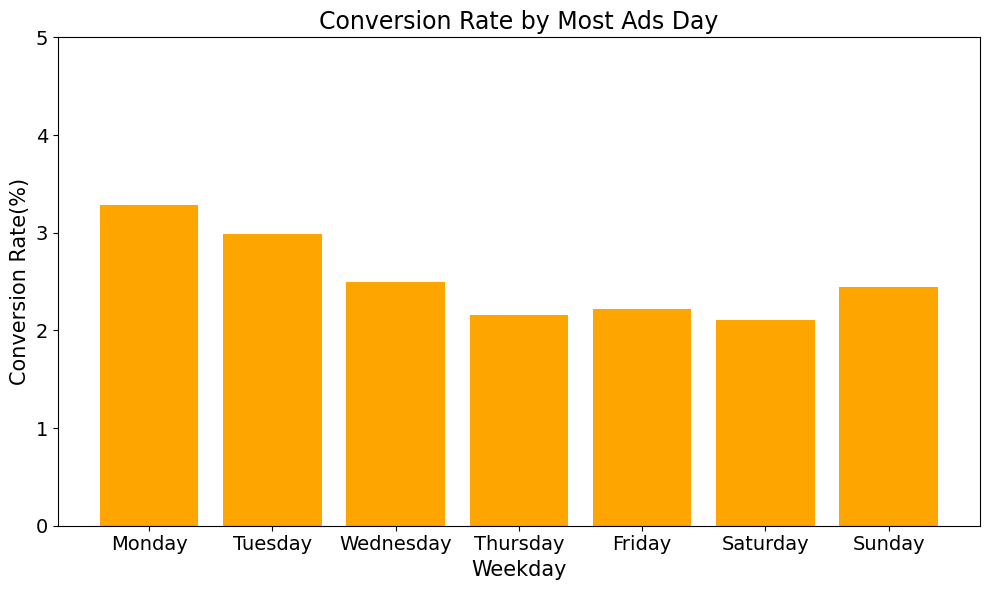

In [26]:
# 요일별 전환율 계산
weekday_conversion_rates = df.groupby('most ads day')['converted'].mean()*100

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 전환율을 지정된 순서로 정렬
weekday_conversion_rates = weekday_conversion_rates.reindex(weekday_order)

# 요일별 전환율 시각화
plt.figure(figsize=(10, 6))
plt.bar(weekday_conversion_rates.index, 
        weekday_conversion_rates.values, 
        color='orange')

plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Conversion Rate(%)', fontsize=15)
plt.title('Conversion Rate by Most Ads Day', fontsize=17)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 5)  # 전환율은 0과 1 사이의 값이므로 y축 범위를 설정합니다.
plt.tight_layout()
plt.show()

- 월요일에 광고가 노출되었을 때 구매로 전환되는 비율이 가장 높다
- 목요일에 광고가 노출되었을 때 구매로 전환되는 비율이 가장 낮다

In [27]:
# 'converted'를 Boolean 값으로 변환 (True/False로 변환)
df['converted'] = df['converted'].astype(bool)

# 요일별 전환율을 'ad'와 'psa' 그룹으로 나누어 계산
conversion_rates = df.groupby(['most ads day', 'test group'])['converted'].mean() * 100
conversion_rates

most ads day  test group
Friday        ad            2.246495
              psa           1.630292
Monday        ad            3.324120
              psa           2.255854
Saturday      ad            2.130657
              psa           1.399580
Sunday        ad            2.461983
              psa           2.059497
Thursday      ad            2.163714
              psa           2.023047
Tuesday       ad            3.044038
              psa           1.444788
Wednesday     ad            2.535586
              psa           1.575931
Name: converted, dtype: float64

In [28]:
from scipy.stats import chi2_contingency

# 요일별 전환율과 광고 유형을 기준으로 교차표 생성
contingency_table = pd.crosstab(df['most ads day'], 
                                df['test group'], 
                                values=df['converted'], 
                                aggfunc='sum').fillna(0)
contingency_table

test group,ad,psa
most ads day,,
Friday,1995,62
Monday,2778,79
Saturday,1679,40
Sunday,2027,63
Thursday,1711,79
Tuesday,2270,42
Wednesday,1963,55


In [29]:
# Chi-square Test 수행
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-square Statistic: 27.1755
P-value: 0.0001


- 광고 유형이 전환율에 실제로 영향을 미친다

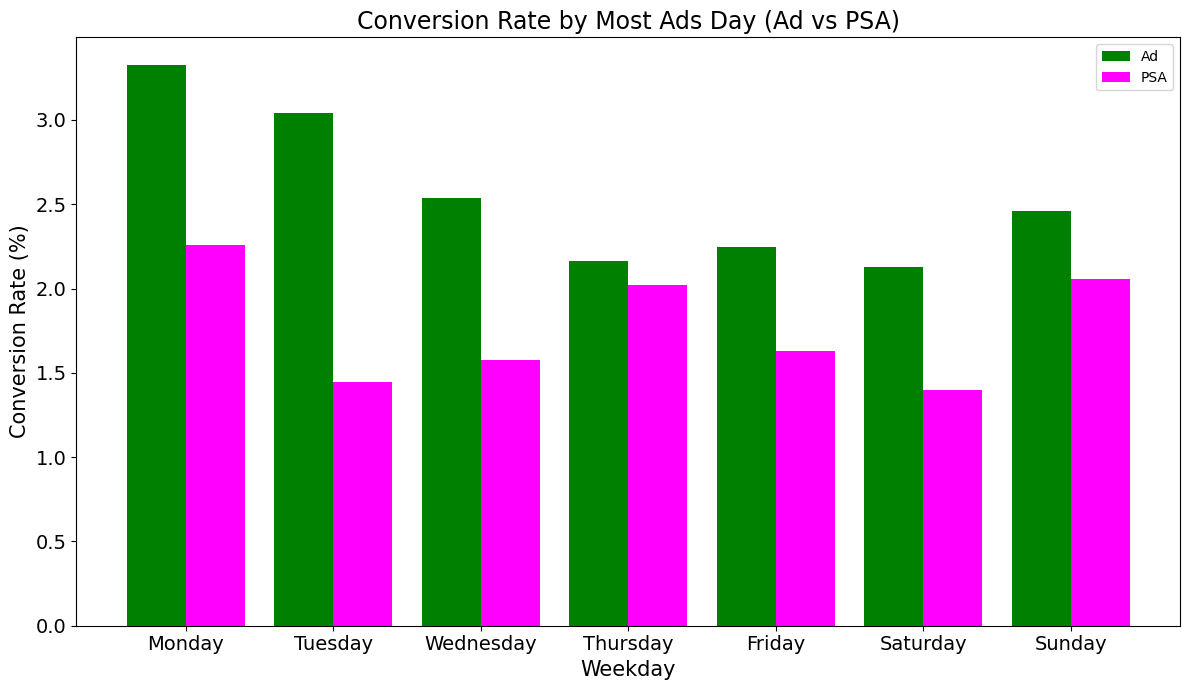

In [30]:
# 'converted'를 Boolean 값으로 변환 (True/False로 변환)
df['converted'] = df['converted'].astype(bool)

# 요일별 전환율을 'ad'와 'psa' 그룹으로 나누어 계산
conversion_rates = df.groupby(['most ads day', 'test group'])['converted'].mean() * 100

# 'ad'와 'psa' 그룹으로 나누기
conversion_rates_ad = conversion_rates.xs('ad', level='test group')
conversion_rates_psa = conversion_rates.xs('psa', level='test group')

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 전환율을 지정된 순서로 정렬
conversion_rates_ad = conversion_rates_ad.reindex(weekday_order, fill_value=0)
conversion_rates_psa = conversion_rates_psa.reindex(weekday_order, fill_value=0)

# 막대 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 7))

# 막대 너비
bar_width = 0.4
# 요일별 막대 위치
x = range(len(weekday_order))

# 'ad' 그룹의 막대 그래프
bars_ad = ax.bar([i - bar_width/2 for i in x], 
                 conversion_rates_ad.values, 
                 width=bar_width, 
                 color='Green', 
                 label='Ad')

# 'psa' 그룹의 막대 그래프
bars_psa = ax.bar([i + bar_width/2 for i in x], 
                  conversion_rates_psa.values, 
                  width=bar_width, 
                  color='fuchsia', 
                  label='PSA')

# 레이블 및 제목 설정
ax.set_xlabel('Weekday', fontsize=15)
ax.set_ylabel('Conversion Rate (%)', fontsize=15)
ax.set_title('Conversion Rate by Most Ads Day (Ad vs PSA)', fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(weekday_order, fontsize=14)
ax.legend()
ax.tick_params(axis='y', labelsize=14)

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

정리

- 전환율 차이 분석:
ad 그룹의 전환율은 psa 그룹의 전환율보다 모든 요일에서 높습니다. 특히 월요일에는 ad 그룹의 전환율이 3.32%로 가장 높고, psa 그룹은 2.26%로 상대적으로 낮습니다.
ad 그룹의 전환율이 평균적으로 더 높다는 것은 광고가 전환율을 증가시키는 데 긍정적인 영향을 미친다는 것을 의미합니다.

- 요일별 차이:
월요일에 ad 그룹의 전환율이 가장 높으며, 이는 광고가 월요일에 특히 효과적일 수 있음을 시사합니다.
화요일에는 psa 그룹의 전환율이 가장 낮아 광고의 효과가 더 두드러집니다.
금요일과 주말에는 ad와 psa 그룹의 전환율 차이가 상대적으로 작지만 여전히 ad 그룹이 더 높은 전환율을 보입니다.

전략적 제안

- 광고 집중 요일 설정:
월요일, 화요일, 일요일과 같은 요일에 광고를 집중하거나 광고 빈도를 높여서 더 높은 전환율을 기대할 수 있습니다.
- 광고 캠페인 최적화:
ad 그룹의 전환율이 psa 그룹보다 유의미하게 높으므로, 광고 전략을 지속적으로 개선하고 최적화하여 광고의 효과를 극대화하는 것이 좋습니다.
- 요일별 캠페인 조정:
요일별 전환율 패턴을 바탕으로 캠페인 일정을 조정하고, 광고의 타겟팅을 요일에 따라 달리 설정하여 더 높은 효과를 얻을 수 있습니다.

# <span style="background-color: pink">시간 기준 전환율 분석

In [31]:
# 각 시간대별로 True와 False 개수 집계
hourly_counts = df.groupby(['most ads hour', 'converted']).size().unstack(fill_value=0).reset_index()

# 컬럼명 수정
hourly_counts.columns.name = None  # 인덱스 이름 제거
hourly_counts.rename(columns={0: 'False', 1: 'True'}, inplace=True)

# 결과 확인
print(hourly_counts)

    most ads hour  False  True
0               0   5434   102
1               1   4740    62
2               2   5294    39
3               3   2651    28
4               4    711    11
5               5    749    16
6               6   2022    46
7               7   6289   116
8               8  17283   344
9               9  30409   595
10             10  38101   838
11             11  45188  1022
12             12  46171  1127
13             13  46479  1176
14             14  44367  1281
15             15  43358  1325
16             16  36411  1156
17             17  34001   987
18             18  31438   885
19             19  29541   811
20             20  28061   862
21             21  29109   867
22             22  25742   690
23             23  19709   457


## 가설 검정
- 귀무가설(H₀): 모든 시간대의 전환율에 차이가 없다.
- 대립가설(H₁): 적어도 하나의 시간대에서 전환율에 유의미한 차이가 있다.

In [32]:
from scipy.stats import kruskal

# 각 시간대별로 'converted' 값을 리스트로 추출
hourly_conversion_data = []
for hour in sorted(df['most ads hour'].unique()):
    hourly_data = df[df['most ads hour'] == hour]['converted']
    hourly_conversion_data.append(hourly_data)

# Kruskal-Wallis H-test 수행
kruskal_result = kruskal(*hourly_conversion_data)

print(f"Kruskal-Wallis H-test - Statistic: {kruskal_result.statistic:.4f}, P-value: {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-test - Statistic: 430.7680, P-value: 0.0000


- 시간대에 따른 전환율 차이가 통계적으로 매우 유의미함
- 시간대별 각 구간이 구매 전환율에 영향을 미치는 것 확인

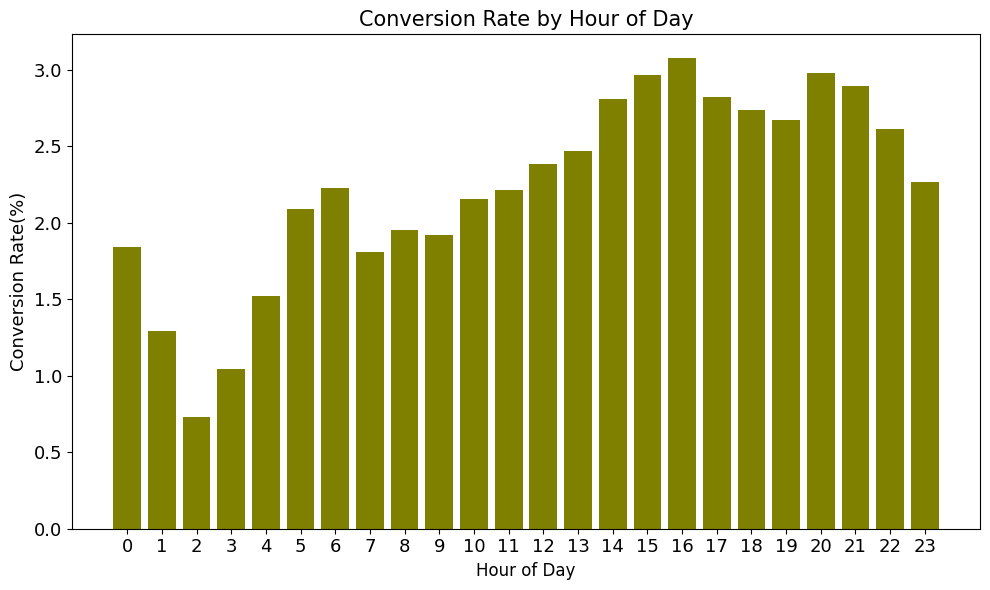

In [33]:
# 각 시간대별 구매 전환율 계산
hourly_conversion_rates = df.groupby('most ads hour')['converted'].mean()*100

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(hourly_conversion_rates.index, 
        hourly_conversion_rates.values, 
        color='olive')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Conversion Rate(%)', fontsize=13)
plt.title('Conversion Rate by Hour of Day', fontsize=15)
plt.xticks(hourly_conversion_rates.index, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

- 새벽 시간대(0시~4시)는 광고에 노출되어도 구매 전환율이 낮음
- 오후부터 저녁 시간대(2시~9시)는 광고에 노출되면 구매 전환율이 높음

In [34]:
# 'converted'를 Boolean 값으로 변환 (True/False로 변환)
df['converted'] = df['converted'].astype(bool)

# 시간대별 전환율을 'ad'와 'psa' 그룹으로 나누어 계산
hourly_conversion_rates = df.groupby(['most ads hour', 'test group'])['converted'].mean() * 100
hourly_conversion_rates = hourly_conversion_rates.unstack().fillna(0)

# 결과 확인
print(hourly_conversion_rates)

test group           ad       psa
most ads hour                    
0              1.921266  0.000000
1              1.343445  0.000000
2              0.756988  0.000000
3              1.042471  1.123596
4              1.585014  0.000000
5              2.156334  0.000000
6              2.317380  0.000000
7              1.848249  0.843882
8              1.986091  1.062215
9              1.952889  1.081531
10             2.184012  1.346801
11             2.246937  1.455604
12             2.413900  1.699029
13             2.506321  1.658986
14             2.857534  1.605136
15             2.984483  2.516411
16             3.089286  2.805486
17             2.853742  2.024584
18             2.747005  2.517703
19             2.680928  2.451395
20             3.027365  1.764160
21             2.917460  2.220167
22             2.645503  1.635769
23             2.297028  1.292407


In [35]:
from scipy.stats import chi2_contingency

# 시간대별 전환율 교차표 생성
contingency_table_hourly = pd.crosstab(df['most ads hour'], 
                                       df['test group'], 
                                       values=df['converted'], 
                                       aggfunc='sum').fillna(0)

contingency_table_hourly

test group,ad,psa
most ads hour,,
0,102,0
1,62,0
2,39,0
3,27,1
4,11,0
5,16,0
6,46,0
7,114,2
8,337,7


In [36]:
# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_hourly)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-square Statistic: 27.2112
P-value: 0.2471


- 귀무가설 (시간대와 광고 유형 간의 독립성 가정)을 기각할 수 없음
- 즉, 시간대와 광고 유형 (ad와 psa) 간의 전환율에 유의미한 차이가 없다!!!
- 이건 통계적으로 유의미하지 않으므로 시각화 안 한다

In [37]:
# 시간대를 3시간 단위로 구간화
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ["00-03", "03-06", "06-09", "09-12", "12-15", "15-18", "18-21", "21-24"]

df['hour_group'] = pd.cut(df['most ads hour'], bins=bins, labels=labels, right=False)

# 각 시간대와 광고 유형별 전환율 계산
conversion_rates_hourly_group = df.groupby(['hour_group', 'test group'])['converted'].mean() * 100

conversion_rates_hourly_group

hour_group  test group
00-03       ad            1.346511
            psa           0.000000
03-06       ad            1.341282
            psa           0.714286
06-09       ad            1.978424
            psa           0.919305
09-12       ad            2.147121
            psa           1.326874
12-15       ad            2.589553
            psa           1.656009
15-18       ad            2.978928
            psa           2.471443
18-21       ad            2.813767
            psa           2.265647
21-24       ad            2.659654
            psa           1.795950
Name: converted, dtype: float64

In [38]:
# 교차표 생성
contingency_table_hourly = pd.crosstab(df['hour_group'], 
                                       df['test group'], 
                                       values=df['converted'], 
                                       aggfunc='sum').fillna(0)

contingency_table_hourly

test group,ad,psa
hour_group,,
00-03,203,0
03-06,54,1
06-09,497,9
09-12,2392,63
12-15,3483,101
15-18,3349,119
18-21,2478,80
21-24,1967,47


In [39]:
# Chi-square 검정 수행
from scipy.stats import chi2_contingency

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table_hourly)
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-square Statistic: 15.9642
P-value: 0.0254


- 시간대와 광고 유형 간의 전환율에는 통계적으로 유의미한 차이가 있다
- 개별 시간으로 분리했을 때는 전환율에 유의미한 차이가 없었음

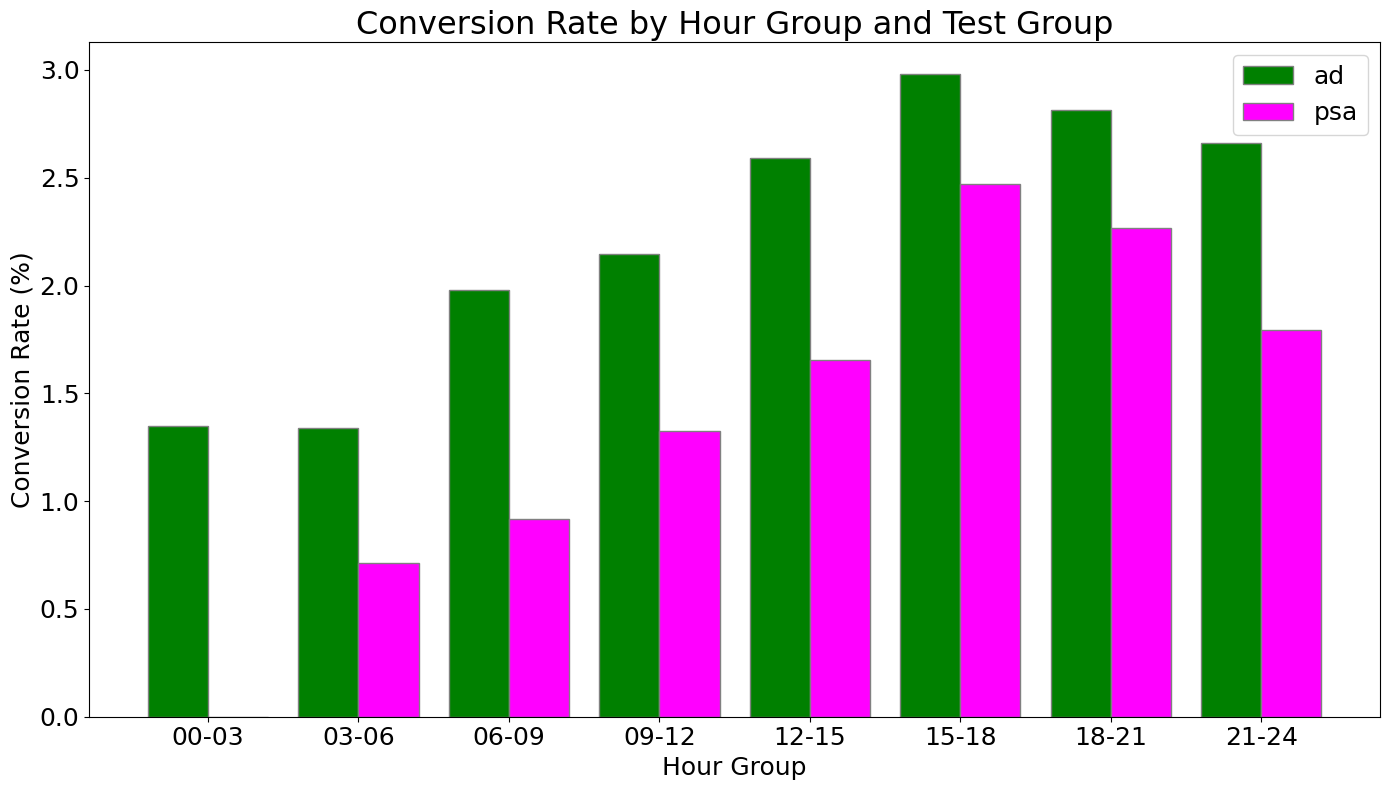

In [40]:
# 'ad'와 'psa'의 전환율을 각각 추출
conversion_rates_hourly_ad = conversion_rates_hourly_group.xs('ad', level='test group')
conversion_rates_hourly_psa = conversion_rates_hourly_group.xs('psa', level='test group')

# 막대 그래프의 너비
bar_width = 0.4

# x축 위치 생성
r1 = np.arange(len(conversion_rates_hourly_ad.index))
r2 = [x + bar_width for x in r1]

# 그래프 생성
plt.figure(figsize=(14, 8))

# 'ad'에 대한 막대 그래프
plt.bar(r1, 
        conversion_rates_hourly_ad, 
        color='green', 
        label='ad', 
        width=bar_width, 
        edgecolor='grey', 
        align='center')

# 'psa'에 대한 막대 그래프
plt.bar(r2, 
        conversion_rates_hourly_psa, 
        color='fuchsia', 
        label='psa', 
        width=bar_width, 
        edgecolor='grey', 
        align='center')

# 그래프 레이블 및 타이틀 설정
plt.xlabel('Hour Group', fontsize=18)
plt.ylabel('Conversion Rate (%)', fontsize=18)
plt.title('Conversion Rate by Hour Group and Test Group', fontsize=23)
plt.xticks(r1 + bar_width / 2, conversion_rates_hourly_ad.index, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()

# 그래프 출력
plt.show()

- 광고 집중 시간대: 15-18시와 18-21시는 전환율이 가장 높은 시간대입니다. 특히 ad 광고의 전환율이 가장 높으므로, 이 시간대에 ad 광고를 집중적으로 노출하는 것이 효과적일 수 있습니다.
- 광고 효과 비교: 전반적으로 ad 광고가 psa 광고보다 높은 전환율을 보이므로, ad 광고가 psa 광고보다 구매 전환을 유도하는 데 더 효과적이라고 결론지을 수 있습니다.
- 비효율적인 시간대 조정: 전환율이 낮은 00-06시 구간에서는 광고 예산을 절약하거나 다른 광고 유형이나 전략을 실험해 볼 수 있습니다.

# <span style="background-color: pink">전환율을 기준으로 특징 분석

In [41]:
print(df['converted'].dtype)

bool


In [42]:
# 'converted'가 False인 그룹 필터링
False_group = df[df['converted'] == False]
print(f"Number of False conversions: {len(False_group)}")

Number of False conversions: 573258


In [43]:
# 'converted'가 True인 그룹 필터링
True_group = df[df['converted'] == True]
print(f"Number of True conversions: {len(True_group)}")

Number of True conversions: 14843


## <span style="background-color: skyblue">전환율 그룹 별 요일 분석

In [44]:
False_day_counts = False_group['most ads day'].value_counts()
True_day_counts = True_group['most ads day'].value_counts()
# 결과 출력
print('비구매  그룹:', False_day_counts)
print('구매  그룹:', True_day_counts)

비구매  그룹: most ads day
Friday       90551
Monday       84216
Sunday       83301
Thursday     81192
Saturday     79941
Wednesday    78890
Tuesday      75167
Name: count, dtype: int64
구매  그룹: most ads day
Monday       2857
Tuesday      2312
Sunday       2090
Friday       2057
Wednesday    2018
Thursday     1790
Saturday     1719
Name: count, dtype: int64


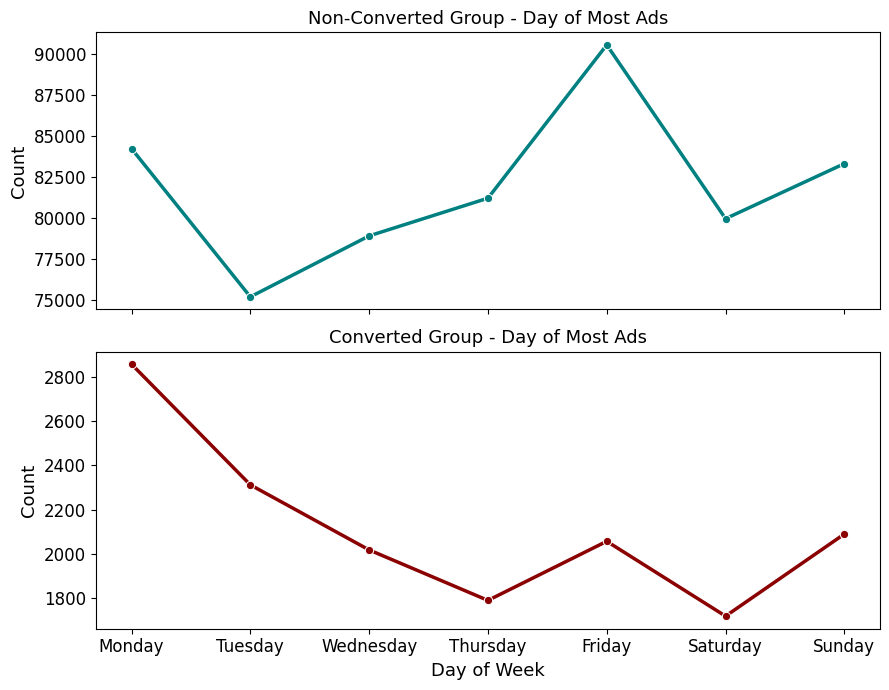

In [45]:
# 'most ads day'의 순서를 월요일부터 일요일까지 지정
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
              'Friday', 'Saturday', 'Sunday']

# 'most ads day'를 범주형 변수로 변환하여 순서 지정
df['most ads day'] = pd.Categorical(df['most ads day'], 
                                    categories=days_order, 
                                    ordered=True)

# 'converted'가 False인 그룹과 True인 그룹의 'most ads day'의 빈도수 계산
False_day_counts = False_group['most ads day'].value_counts().reindex(days_order, fill_value=0)
True_day_counts = True_group['most ads day'].value_counts().reindex(days_order, fill_value=0)

# 데이터 프레임으로 변환
False_day_counts_df = False_day_counts.reset_index()
True_day_counts_df = True_day_counts.reset_index()

# 컬럼명 수정
False_day_counts_df.columns = ['most ads day', 'count']
True_day_counts_df.columns = ['most ads day', 'count']

# 시각화를 위한 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(9,7), sharex=True)

# False 그룹의 선 그래프
sns.lineplot(data=False_day_counts_df, x='most ads day', y='count', 
             marker='o', linewidth=2.5, color='teal', ax=axes[0])
axes[0].set_title('Non-Converted Group - Day of Most Ads', fontsize=13)
axes[0].set_ylabel('Count', fontsize=13)
axes[0].set_xlabel('Day of Week', fontsize=13)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# True 그룹의 선 그래프
sns.lineplot(data=True_day_counts_df, x='most ads day', y='count', 
             marker='o', linewidth=2.5, color='darkred', ax=axes[1])
axes[1].set_title('Converted Group - Day of Most Ads', fontsize=13)
axes[1].set_ylabel('Count', fontsize=13)
axes[1].set_xlabel('Day of Week', fontsize=13)
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

#### 비구매 그룹 (False):
- 금요일 > 월요일 > 일요일 순으로 높음
- 화요일, 수요일, 목요일 순으로 낮음
#### --> 왜 그런지 분석 필요

#### 구매 그룹 (True):
- 월요일 > 화요일 > 일요일 순으로 높음
- 토요일, 목요일 순으로 낮음
#### --> 왜 그런지 분석 필요

## <span style="background-color: skyblue">비구매 그룹에서 total ads를 분석

In [46]:
False_group = df[df['converted'] == False]

# 요일별로 비구매 그룹 추출
days_of_interest = ['Friday', 'Monday', 'Sunday']
other_days = [day for day in False_group['most ads day'].unique() if day not in days_of_interest]

# 관심 요일과 나머지 요일에 따른 비구매 그룹 추출
False_group_interested_days = False_group[False_group['most ads day'].isin(days_of_interest)]
False_group_other_days = False_group[False_group['most ads day'].isin(other_days)]

In [47]:
# 기술 통계량 계산
stats_interested_days = False_group_interested_days['total ads'].describe()
stats_other_days = False_group_other_days['total ads'].describe()

print("관심 요일 그룹의 기술 통계량:")
print(stats_interested_days)

print("\n나머지 요일 그룹의 기술 통계량:")
print(stats_other_days)

관심 요일 그룹의 기술 통계량:
count    258068.000000
mean         23.888723
std          42.656627
min           1.000000
25%           4.000000
50%          13.000000
75%          26.000000
max        2065.000000
Name: total ads, dtype: float64

나머지 요일 그룹의 기술 통계량:
count    315190.000000
mean         22.802503
std          39.327230
min           1.000000
25%           4.000000
50%          12.000000
75%          26.000000
max        1414.000000
Name: total ads, dtype: float64


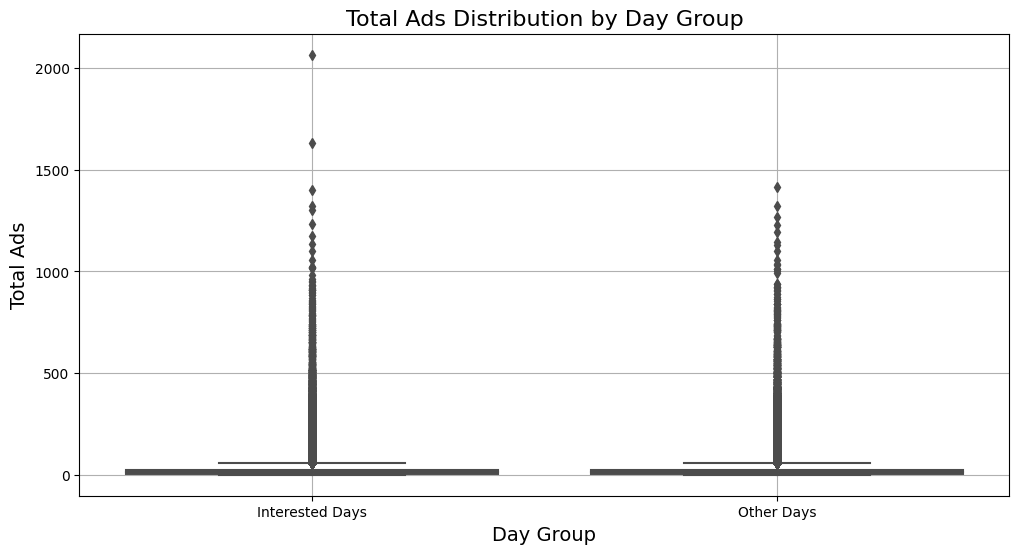

In [48]:
# 데이터 병합
df_combined = df[df['converted'] == False].copy()
df_combined['day_group'] = ['Interested Days' if day in ['Friday', 'Monday', 'Sunday'] else 'Other Days' for day in df_combined['most ads day']]

# 상자 수염 그림
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_group', y='total ads', data=df_combined, palette={'Interested Days': 'blue', 'Other Days': 'orange'})
plt.title('Total Ads Distribution by Day Group', fontsize=16)
plt.xlabel('Day Group', fontsize=14)
plt.ylabel('Total Ads', fontsize=14)
plt.grid(True)
plt.show()

In [49]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test 수행
u_stat, u_p_value = mannwhitneyu(False_group_interested_days['total ads'], False_group_other_days['total ads'])

print(f"Mann-Whitney U test - Statistic: {u_stat:.4f}, P-value: {u_p_value:.4f}")

Mann-Whitney U test - Statistic: 41219361874.0000, P-value: 0.0000


- 기술 통계량으로 볼 때는 평균이 각각 23과 22로 차이가 크지 않음
- 검정했을 때, 관심 요일 그룹과 나머지 요일 그룹 간의 광고 시청 횟수(total ads)의 차이가 통계적으로 유의미


#### 전략
- 광고 시청 횟수의 분포가 다른 요일에 비해 다르므로, 이 요일들에 더 집중적인 광고 노출

## <span style="background-color: skyblue">구매 그룹에서 total ads 다시 분석

In [50]:
True_group = df[df['converted'] == True]

# 요일별로 비구매 그룹 추출
days_of_interest = ['Monday', 'Wednesday', 'Sunday']
other_days = [day for day in True_group['most ads day'].unique() if day not in days_of_interest]

# 관심 요일과 나머지 요일에 따른 비구매 그룹 추출
True_group_interested_days = True_group[True_group['most ads day'].isin(days_of_interest)]
True_group_other_days = True_group[True_group['most ads day'].isin(other_days)]

In [51]:
# 기술 통계량 계산
True_stats_interested_days = True_group_interested_days['total ads'].describe()
True_stats_other_days = True_group_other_days['total ads'].describe()

print("관심 요일 그룹의 기술 통계량:")
print(True_stats_interested_days)

print("\n나머지 요일 그룹의 기술 통계량:")
print(True_stats_other_days)

관심 요일 그룹의 기술 통계량:
count    6965.000000
mean       82.647236
std        83.996853
min         1.000000
25%        34.000000
50%        64.000000
75%       102.000000
max      1491.000000
Name: total ads, dtype: float64

나머지 요일 그룹의 기술 통계량:
count    7878.000000
mean       84.984514
std        90.394315
min         1.000000
25%        35.000000
50%        64.000000
75%       104.000000
max      1778.000000
Name: total ads, dtype: float64


In [52]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test 수행
u_stat, u_p_value = mannwhitneyu(True_group_interested_days['total ads'],
                                 True_group_other_days['total ads'])

print(f"Mann-Whitney U test - Statistic: {u_stat:.4f}, P-value: {u_p_value:.4f}")

Mann-Whitney U test - Statistic: 27122780.0000, P-value: 0.2305


- 관심 요일(월요일, 수요일, 일요일)과 나머지 요일 간의 total ads에 큰 차이가 없음

## <span style="background-color: skyblue">비구매그룹 / 구매 그룹에서 광고 종류 분석  

In [53]:
False_group_counts = False_group['test group'].value_counts()
True_group_counts = True_group['test group'].value_counts()

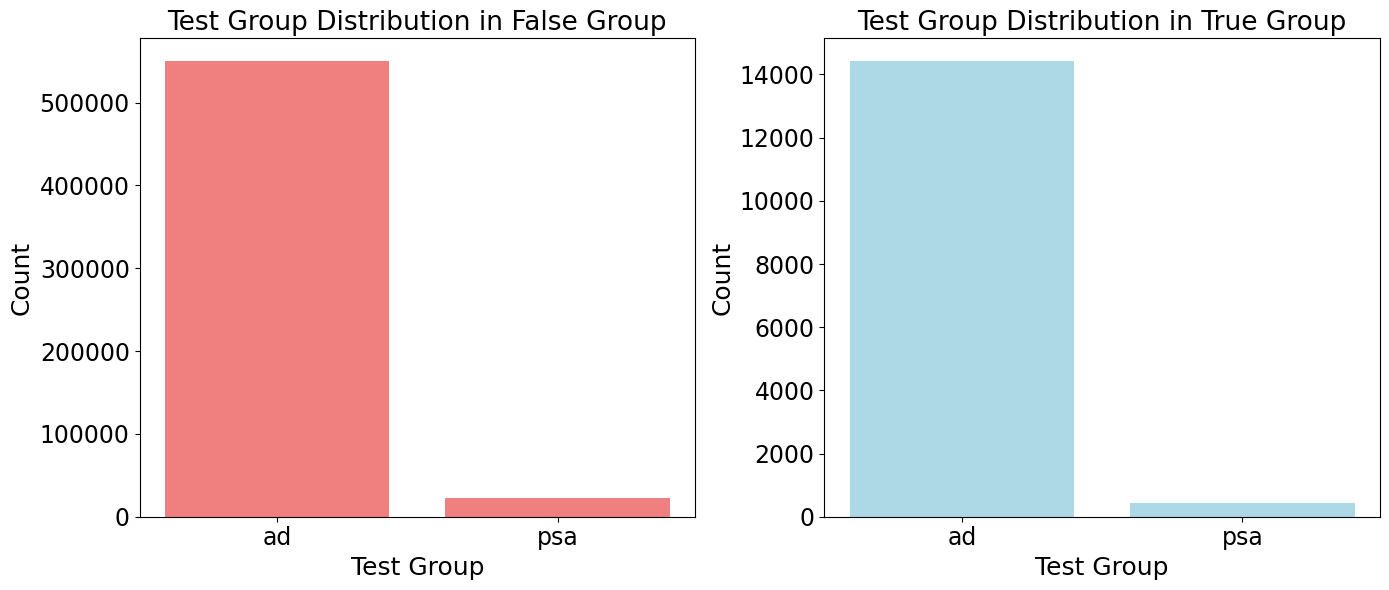

In [54]:
# 서브플롯 생성 (1행 2열)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 비구매 그룹 (False Group) 시각화
ax1.bar(False_group_counts.index, False_group_counts.values, color='lightcoral')
ax1.set_title('Test Group Distribution in False Group', fontsize=19)
ax1.set_xlabel('Test Group', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_xticks(False_group_counts.index)
ax1.set_xticklabels(False_group_counts.index, fontsize=17)
ax1.tick_params(axis='y', labelsize=17)  # y축 레이블 폰트 크기 설정

# 구매 그룹 (True Group) 시각화
ax2.bar(True_group_counts.index, True_group_counts.values, color='lightblue')
ax2.set_title('Test Group Distribution in True Group', fontsize=19)
ax2.set_xlabel('Test Group', fontsize=18)
ax2.set_ylabel('Count', fontsize=18)
ax2.set_xticks(True_group_counts.index)
ax2.set_xticklabels(True_group_counts.index, fontsize=17)
ax2.tick_params(axis='y', labelsize=17)  # y축 레이블 폰트 크기 설정

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [55]:
# 각 그룹의 비율 계산
False_group_ratios = False_group['test group'].value_counts(normalize=True)
True_group_ratios = True_group['test group'].value_counts(normalize=True)

# 결과 출력
print("비구매 그룹 (False Group) 비율:")
print(False_group_ratios)

print("\n구매 그룹 (True Group) 비율:")
print(True_group_ratios)

비구매 그룹 (False Group) 비율:
test group
ad     0.959697
psa    0.040303
Name: proportion, dtype: float64

구매 그룹 (True Group) 비율:
test group
ad     0.971704
psa    0.028296
Name: proportion, dtype: float64
